In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy import units as u

In [3]:
pars = pd.read_csv('../catalogs+tables/supernovae_cat_rect_58_56_-31_-32.csv')

In [4]:
lcs = pd.read_csv('../lightcurves/lightcurves_cat_rect_58.0_56.0_-31.0_-32.0.csv')

In [5]:
lccols = lcs.columns

In [6]:
lccols

Index(['Unnamed: 0', 'mjd', 'filter', 'visitn', 'MS_9172_5_observable',
       'MS_9172_5_observed', 'MS_9172_5_flux', 'MS_9172_5_fluxErr',
       'MS_9172_5_mag', 'MS_9172_5_magErr',
       ...
       'MS_9300_4212_flux', 'MS_9300_4212_fluxErr', 'MS_9300_4212_mag',
       'MS_9300_4212_magErr', 'MS_9300_4214_observable',
       'MS_9300_4214_observed', 'MS_9300_4214_flux', 'MS_9300_4214_fluxErr',
       'MS_9300_4214_mag', 'MS_9300_4214_magErr'],
      dtype='object', length=12832)

In [7]:
pars.head()

,Unnamed: 0,htmid_level_6,galaxy_id,c_in,mB,t0_in,x0_in,x1_in,z_in,snid_in,snra_in,sndec_in
0,0,9197,3375000702,-0.046027,18.036843,61077.901961,0.000961,1.257934,0.060254,MS_9172_5,57.639403,-31.045886
1,1,9197,3375015265,-0.017979,20.709378,63089.102993,0.000083,-0.604813,0.161702,MS_9172_30,57.869726,-31.051645
2,2,9197,3375016182,0.090509,20.845817,62415.273663,0.000073,-1.663310,0.173414,MS_9172_35,57.455371,-31.020840
3,3,9197,3375027636,-0.048207,20.221406,61897.871707,0.000129,0.677895,0.197648,MS_9172_47,57.328133,-31.026872
4,4,9197,3375026039,-0.057482,20.726292,59805.838507,0.000081,1.063334,0.208735,MS_9172_56,57.568886,-31.144036


In [8]:
pars.sort_values('z_in', inplace=True)

Let's iterate through the `pars` table sorted by redshift. 

Create a sheet of lightcurves!

In [9]:
times = lcs['mjd']
filts = lcs['filter']

In [30]:
lcs[['mjd', 'filter', 'MS_9172_5_flux', 'MS_9172_5_fluxErr', 'MS_9172_5_mag', 'MS_9172_5_magErr', 'MS_9172_5_observed']]

,mjd,filter,MS_9172_5_flux,MS_9172_5_fluxErr,MS_9172_5_mag,MS_9172_5_magErr,MS_9172_5_observed
0,59588.094752,y,0.0,2.615966e-10,inf,inf,False
1,59588.095201,y,0.0,2.644938e-10,inf,inf,True
2,59589.200927,i,0.0,7.553190e-11,inf,inf,True
3,59589.214371,i,0.0,7.311206e-11,inf,inf,False
4,59591.084162,z,0.0,1.129834e-10,inf,inf,False
5,59591.085526,z,0.0,1.130415e-10,inf,inf,True
6,59591.106601,z,0.0,1.239346e-10,inf,inf,True
7,59591.107050,z,0.0,1.272929e-10,inf,inf,True
8,59597.080689,y,0.0,3.262439e-10,inf,inf,True
9,59597.081138,y,0.0,3.229483e-10,inf,inf,True


<Figure size 432x288 with 0 Axes>

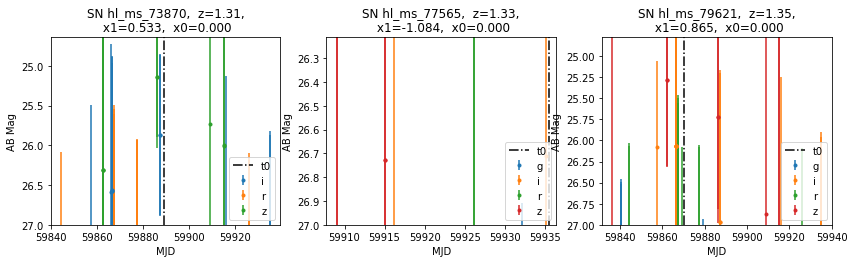

In [10]:
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
i = 1
i_page = 1
with PdfPages('multipage_pdf.pdf') as pdf:
    
    plt.figure()
    
    plt.figure(figsize=(14, 20))
    plt.title('LCs Page 1')
    for i_sn, a_sne in pars.iterrows():
        obj = a_sne['snid_in']
        lc1 = lcs[lcs[obj+'_flux']!=0][['mjd', 'filter', obj+'_flux', obj+'_fluxErr', obj+'_mag', obj+'_magErr', obj+'_observed']]
        lc1 = lc1[lc1[obj+'_observed']]
        if len(lc1) is 0:
            continue
        plt.subplot(5, 3, i)
        plt.title('SN %s,  z=%.2f,\n x1=%.3f,  x0=%.3f' % tuple(a_sne[['snid_in','z_in','x1_in','x0_in']].values))
        max_brights = []
        for afilt in np.unique(filts):
            thelc = lc1[lc1['filter']==afilt]
            if len(thelc) is not 0:
                plt.errorbar(thelc.mjd, thelc[obj+'_mag'], yerr=thelc[obj+'_magErr'], fmt='.', label=afilt)
            max_brights.append(np.min(thelc[obj+'_mag'])-0.5)
        max_brights = np.array(max_brights)
        max_brights = max_brights[~np.isnan(max_brights)]
        try: plt.ylim(27, np.max([17.5, np.min(max_brights)]))
        except: plt.gca().invert_yaxis()
            
        plt.axvline(x=a_sne['t0_in'], color='k', ls='-.', label='t0')
        #plt.gca().invert_yaxis()
        plt.legend(loc='lower right')
        plt.xlabel('MJD')
        plt.ylabel('AB Mag')
        i += 1
        if i == 16:
            i = 1
            plt.tight_layout()
            pdf.savefig()
            plt.close()
            
            plt.figure(figsize=(14, 20))
            plt.title('LCs Page %d' % i_page)
            
    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = 'Lightcurves from SALT2 pars WFD'
    d['Author'] = 'B. SANCHEZ'
    d['Subject'] = '2 sq.degree SNe in DC2 Run2.1i'
    
    d['CreationDate'] = datetime(2019, 11, 9)
    d['ModDate'] = datetime.today()

In [11]:
objects = [colname.strip('_fluxErr') for colname in lcs.columns if 'fluxErr' in colname ]

In [12]:
lc_tables = [lcs[lcs[obj+'_flux']!=0][['mjd', 'filter', obj+'_flux', obj+'_fluxErr', obj+'_mag', obj+'_magErr', obj+'_observed']] for obj in objects]

Text(0, 0.5, 'AB Mag')

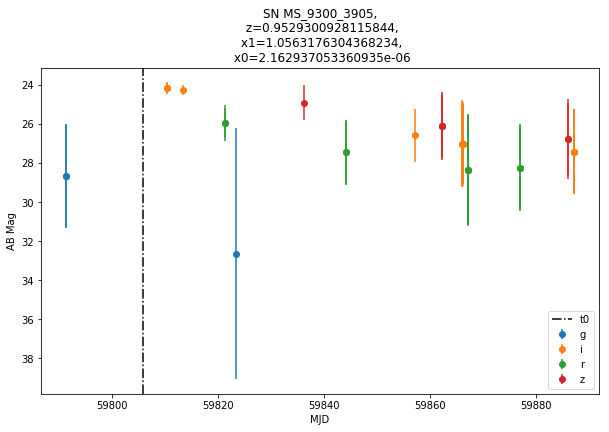

In [13]:
lc_len = 0
while lc_len < 20:
    i = np.random.randint(len(objects))
    #print(i)
    lc1 = lc_tables[i]
    #print(len(lc1))
    lc_len = len(lc1)
thisn_pars = pars[pars['snid_in']==objects[i]]

plt.figure(figsize=(10, 6))
for afilt in np.unique(filts):
    plt.title('SN {},\n z={},\n x1={},\n x0={}'.format(objects[i], 
        thisn_pars['z_in'].values[0], thisn_pars['x1_in'].values[0], 
        thisn_pars['x0_in'].values[0], ))
    
    thelc = lc1[lc1['filter']==afilt]
    thelc = thelc[thelc[objects[i]+'_observed']]
    if len(thelc) is not 0:
        plt.errorbar(thelc.mjd, thelc[objects[i]+'_mag'], yerr=thelc[objects[i]+'_magErr'], fmt='o', label=afilt)
plt.axvline(x=thisn_pars['t0_in'].values[0], color='k', ls='-.', label='t0')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.xlabel('MJD')
plt.ylabel('AB Mag')